In [11]:
import numpy as np

class SimpleLinearRegression2:
    def __init__(self):
        """初始化Single Linear Regression模型"""
        self.a_ = None
        self.b_ = None
        
    def fit(self, x_train, y_train):
        """根据训练数据集X_train, y_train训练Single Linear Regression模型"""
        assert x_train.ndim == 1, "Simple Linear Regressor can only solve single feature training data"
        assert len(x_train) == len(y_train), "the size of x_train must be equal to the size of y_train"
        
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
    
        num = (x_train - x_mean).dot(y_train - y_mean)
        d = (x_train - x_mean).dot(x_train - x_mean)

        self.a_ = num / d
        self.b_ = y_mean - self.a_ * x_mean
        
    def predict(self, x_predict):
        """给定待测数据集X_predict，返回表示x_predict的结果向量"""
        assert x_predict.ndim == 1, "Simple Linear Regressor can only solve single feature training data"
        assert self.a_ is not None and self.b_ is not None, "must fit before predict"
        return [self._predict(x) for x in x_predict]
    
    def _predict(self, x_single):
        """给定单个待预测数据s_single，返回x_single的预测结果"""
        return self.a_ * x_single + self.b_
    
    def __repr__(self):
        return "SimpleLinearRegression2()"

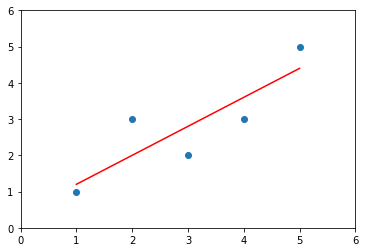

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

reg2 = SimpleLinearRegression2()
reg2.fit(x, y)

y_hat2 = reg2.predict(x)

plt.scatter(x, y)
plt.plot(x, y_hat2, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

### 向量化实现的性能测试

In [13]:
import numpy as np

class SimpleLinearRegression1:
    def __init__(self):
        """初始化Single Linear Regression模型"""
        self.a_ = None
        self.b_ = None
        
    def fit(self, x_train, y_train):
        """根据训练数据集X_train, y_train训练Single Linear Regression模型"""
        assert x_train.ndim == 1, "Simple Linear Regressor can only solve single feature training data"
        assert len(x_train) == len(y_train), "the size of x_train must be equal to the size of y_train"
        
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        num = 0.0
        d = 0.0
        for x_i, y_i in zip(x_train, y_train):
            num += (x_i - x_mean) * (y_i - y_mean)
            d += (x_i - x_mean) ** 2

        self.a_ = num / d
        self.b_ = y_mean - self.a_ * x_mean
        
    def predict(self, x_predict):
        """给定待测数据集X_predict，返回表示x_predict的结果向量"""
        assert x_predict.ndim == 1, "Simple Linear Regressor can only solve single feature training data"
        assert self.a_ is not None and self.b_ is not None, "must fit before predict"
        return [self._predict(x) for x in x_predict]
    
    def _predict(self, x_single):
        """给定单个待预测数据s_single，返回x_single的预测结果"""
        return self.a_ * x_single + self.b_
    
    def __repr__(self):
        return "SimpleLinearRegression1()"

In [14]:
reg1 = SimpleLinearRegression1()

In [15]:
m = 1000000
big_x = np.random.random(size = m)
big_y = big_x * 3.0 + 2.0 + np.random.normal(size = m)

In [16]:
%timeit reg1.fit(big_x, big_y)
%timeit reg2.fit(big_x, big_y)

1.15 s ± 12.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
25.2 ms ± 2.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
